# Limpieza de Datos y Modelos de Machine Learning

### Nombre: Alejandro Thompson

## I) Importación y Limpieza de Datos

### A) Importación de Librerias

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


### B) Determinar y/o establecer el directorio de trabajo si es que fuese necesario

In [ ]:
import os

wd = os.getcwd()
print("working directory is ", wd)

os.chdir('c:/users/lucio/Downloads/revision_progra_con_python.ipynb-20210626T124029Z-001/proyecto')
wd = os.getcwd()
print("working directory is ", wd)

working directory is  C:\Users\lucio\Downloads\revision_progra_con_python.ipynb-20210626T124029Z-001
working directory is  c:\users\lucio\Downloads\revision_progra_con_python.ipynb-20210626T124029Z-001\proyecto


### C) Leer los datos de archivos CSV

In [ ]:
df_enc_emp = pd.read_csv('employee_survey_data.csv')
print(f"{df_enc_emp}")
df_enc_adm = pd.read_csv('manager_survey_data.csv')
print(f"{df_enc_adm}")
df_enc_adm.loc[:,"[_employee _id_]"]
df_emp_gen = pd.read_csv('general_data.csv')
print(f"{df_emp_gen}")


      emp_id  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0          1                      3.0              4.0              2.0
1          2                      3.0              2.0              4.0
2          3                      2.0              2.0              1.0
3          4                      4.0              4.0              3.0
4          5                      4.0              1.0              3.0
...      ...                      ...              ...              ...
4405    4406                      4.0              1.0              3.0
4406    4407                      4.0              4.0              3.0
4407    4408                      1.0              3.0              3.0
4408    4409                      4.0              1.0              3.0
4409    4410                      1.0              3.0              NaN

[4410 rows x 4 columns]
      [_employee _id_]  JobInvolvement  PerformanceRating
0                    1               3               

### D) Uniformizando nombres de columnas

In [ ]:
df_enc_emp.columns
df_enc_emp.dtypes

emp_id                       int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
dtype: object

In [ ]:
df_enc_adm.columns
df_enc_adm.dtypes

[_employee _id_]     int64
JobInvolvement       int64
PerformanceRating    int64
dtype: object

In [ ]:
df_enc_adm.columns=[x.replace("[_employee _id_]","emp_id") for x in df_enc_adm.columns]
display(df_enc_adm)

emp_id  JobInvolvement  PerformanceRating
0          1               3                  3
1          2               2                  4
2          3               3                  3
3          4               2                  3
4          5               3                  3
...      ...             ...                ...
4405    4406               3                  3
4406    4407               2                  3
4407    4408               3                  4
4408    4409               2                  3
4409    4410               4                  3

[4410 rows x 3 columns]

In [ ]:
df_emp_gen.columns
df_emp_gen.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [ ]:
df_emp_gen.columns=[x.replace("EmployeeID","emp_id") for x in df_emp_gen.columns]
df_emp_gen.head(5)

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  emp_id  Gender  ...  \
0          2  Life Sciences              1       1  Female  ...   
1          1  Life Sciences              1       2  Female  ...   
2          4          Other              1       3    Male  ...   
3          5  Life Sciences              1       4    Male  ...   
4          1        Medical              1       5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   
4                 4.0      Y                12              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   
4                 2               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

### E) Hacer Merge de los dataframes

In [ ]:
#hacer de Merge de las dataframes
df1=df_emp_gen.merge(df_enc_emp,on="emp_id",how="inner")
#df1.set_index("EmployeeID",inplace=True)
df1.head(5)

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  emp_id  Gender  ...  \
0          2  Life Sciences              1       1  Female  ...   
1          1  Life Sciences              1       2  Female  ...   
2          4          Other              1       3    Male  ...   
3          5  Life Sciences              1       4    Male  ...   
4          1        Medical              1       5    Male  ...   

   StandardHours StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0              8                0               1.0                      6   
1              8                1               6.0                      3   
2              8                3               5.0                      2   
3              8                3              13.0                      5   
4              8                2               9.0                      2   

   YearsAtCompany YearsSinceLastPromotion  YearsWithCurrManager  \
0               1                       0                     0   
1               5                       1                     4   
2               5                       0                     3   
3               8                       7                     5   
4               6                       0                     4   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  
0                      3.0              4.0              2.0  
1                      3.0              2.0              4.0  
2                      2.0              2.0              1.0  
3                      4.0              4.0              3.0  
4                      4.0              1.0              3.0  

[5 rows x 27 columns]

In [ ]:
df=df1.merge(df_enc_adm,on="emp_id",how="inner")
df.head(5)

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  emp_id  Gender  ...  \
0          2  Life Sciences              1       1  Female  ...   
1          1  Life Sciences              1       2  Female  ...   
2          4          Other              1       3    Male  ...   
3          5  Life Sciences              1       4    Male  ...   
4          1        Medical              1       5    Male  ...   

   TotalWorkingYears TrainingTimesLastYear YearsAtCompany  \
0                1.0                     6              1   
1                6.0                     3              5   
2                5.0                     2              5   
3               13.0                     5              8   
4                9.0                     2              6   

   YearsSinceLastPromotion  YearsWithCurrManager EnvironmentSatisfaction  \
0                        0                     0                     3.0   
1                        1                     4                     3.0   
2                        0                     3                     2.0   
3                        7                     5                     4.0   
4                        0                     4                     4.0   

   JobSatisfaction  WorkLifeBalance  JobInvolvement  PerformanceRating  
0              4.0              2.0               3                  3  
1              2.0              4.0               2                  4  
2              2.0              1.0               3                  3  
3              4.0              3.0               2                  3  
4              1.0              3.0               3                  3  

[5 rows x 29 columns]

### F) Inspeccionando el dataframe obtenido

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'emp_id', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
emp_id                       int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating   

In [ ]:
df

Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  emp_id  \
0                    6          2  Life Sciences              1       1   
1                   10          1  Life Sciences              1       2   
2                   17          4          Other              1       3   
3                    2          5  Life Sciences              1       4   
4                   10          1        Medical              1       5   
...                ...        ...            ...            ...     ...   
4405                 5          4        Medical              1    4406   
4406                 2          4        Medical              1    4407   
4407                25          2  Life Sciences              1    4408   
4408                18          2        Medical              1    4409   
4409                28          3        Medical              1    4410   

      Gender  ...  TotalWorkingYears TrainingTimesLastYear YearsAtCompany  \
0     Female  ...                1.0                     6              1   
1     Female  ...                6.0                     3              5   
2       Male  ...                5.0                     2              5   
3       Male  ...               13.0                     5              8   
4       Male  ...                9.0                     2              6   
...      ...  ...                ...                   ...            ...   
4405  Female  ...               10.0                     5              3   
4406    Male  ...               10.0                     2              3   
4407    Male  ...                5.0                     4              4   
4408    Male  ...               10.0                     2              9   
4409    Male  ...                NaN                     6             21   

      YearsSinceLastPromotion  YearsWithCurrManager EnvironmentSatisfaction  \
0                           0                     0                     3.0   
1                           1                     4                     3.0   
2                           0                     3                     2.0   
3                           7                     5                     4.0   
4                           0                     4                     4.0   
...                       ...                   ...                     ...   
4405                        0                     2                     4.0   
4406                        0                     2                     4.0   
4407                        1                     2                     1.0   
4408                        7                     8                     4.0   
4409                        3                     9                     1.0   

      JobSatisfaction  WorkLifeBalance  JobInvolvement  PerformanceRating  
0                 4.0              2.0               3                  3  
1                 2.0              4.0               2                  4  
2                 2.0              1.0               3                  3  
3                 4.0              3.0               2                  3  
4                 1.0              3.0               3    

### G) Verificando duplicados

In [ ]:
#Verificando duplicados
dx=df.drop_duplicates()
display(dx)

Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  emp_id  \
0                    6          2  Life Sciences              1       1   
1                   10          1  Life Sciences              1       2   
2                   17          4          Other              1       3   
3                    2          5  Life Sciences              1       4   
4                   10          1        Medical              1       5   
...                ...        ...            ...            ...     ...   
4405                 5          4        Medical              1    4406   
4406                 2          4        Medical              1    4407   
4407                25          2  Life Sciences              1    4408   
4408                18          2        Medical              1    4409   
4409                28          3        Medical              1    4410   

      Gender  ...  TotalWorkingYears TrainingTimesLastYear YearsAtCompany  \
0     Female  ...                1.0                     6              1   
1     Female  ...                6.0                     3              5   
2       Male  ...                5.0                     2              5   
3       Male  ...               13.0                     5              8   
4       Male  ...                9.0                     2              6   
...      ...  ...                ...                   ...            ...   
4405  Female  ...               10.0                     5              3   
4406    Male  ...               10.0                     2              3   
4407    Male  ...                5.0                     4              4   
4408    Male  ...               10.0                     2              9   
4409    Male  ...                NaN                     6             21   

      YearsSinceLastPromotion  YearsWithCurrManager EnvironmentSatisfaction  \
0                           0                     0                     3.0   
1                           1                     4                     3.0   
2                           0                     3                     2.0   
3                           7                     5                     4.0   
4                           0                     4                     4.0   
...                       ...                   ...                     ...   
4405                        0                     2                     4.0   
4406                        0                     2                     4.0   
4407                        1                     2                     1.0   
4408                        7                     8                     4.0   
4409                        3                     9                     1.0   

      JobSatisfaction  WorkLifeBalance  JobInvolvement  PerformanceRating  
0                 4.0              2.0               3                  3  
1                 2.0              4.0               2                  4  
2                 2.0              1.0               3                  3  
3                 4.0              3.0               2                  3  
4                 1.0              3.0               3    

### Como puede verse no hay duplicados, es la misma cantidad de filas en ambos dataframes

### H) Explorando datos

In [ ]:
desc_df = df.describe()
desc_df

Age  DistanceFromHome    Education  EmployeeCount       emp_id  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4391.000000        4410.000000   
mean      2.063946   65029.312925            2.694830          15.209524   
std       1.106689   47068.888559            2.498887           3.659108   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49190.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StandardHours  ...  TotalWorkingYears  TrainingTimesLastYear  \
count         4410.0  ...        4401.000000            4410.000000   
mean             8.0  ...          11.279936               2.799320   
std              0.0  ...           7.782222               1.288978   
min              8.0  ...           0.000000               0.000000   
25%              8.0  ...           6.000000               2.000000   
50%              8.0  ...          10.000000               3.000000   
75%              8.0  ...          15.000000               3.000000   
max              8.0  ...          40.000000               6.000000   

       YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  \
count     4410.000000              4410.000000           4410.000000   
mean         7.008163                 2.187755              4.123129   
std          6.125135                 3.221699              3.567327   
min          0.000000                 0.000000              0.000000   
25%          3.000000                 0.000000              2.000000   
50%          5.000000                 1.000000              3.000000   
75%          9.000000                 3.000000              7.000000   
max         40.000000                15.000000             17.000000   

       EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
count              4385.000000      4390.000000      4372.000000   
mean                  2.723603         2.728246         2.761436   
std                   1.092756         1.101253         0.706245   
min                   1.000000         1.000000         1.000000   
25%                   2.000000         2.000000         2.000000   
50%                   3.000000         3.000000         3.000000   
75%                   4.000000         4.000000         3.000000   
max                   4.000000         4.000000         4.000000   

       JobInvolvement  PerformanceRating  
count     4410.000000        4410.000000  
mean         2.729932           3.153741  
std          0.711400           0.360742  
min          1.000000           3.000000  
25%          2.000000           3.000000  
50%          3.000000           3.000000  
75%          3.000000           3.000000  
max          4.000000           4.000000  

[8 rows x 21 columns]

In [ ]:
 desc_df.loc[:,['StandardHours','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany']]


StandardHours  StockOptionLevel  TotalWorkingYears  \
count         4410.0       4410.000000        4401.000000   
mean             8.0          0.793878          11.279936   
std              0.0          0.851883           7.782222   
min              8.0          0.000000           0.000000   
25%              8.0          0.000000           6.000000   
50%              8.0          1.000000          10.000000   
75%              8.0          1.000000          15.000000   
max              8.0          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  
count            4410.000000     4410.000000  
mean                2.799320        7.008163  
std                 1.288978        6.125135  
min                 0.000000        0.000000  
25%                 2.000000        3.000000  
50%                 3.000000        5.000000  
75%                 3.000000        9.000000  
max                 6.000000       40.000000

### I) Trabajando los valores NaN

In [ ]:
is_null_df = df.isnull()

In [ ]:
is_null_df

Age  Attrition  BusinessTravel  Department  DistanceFromHome  \
0     False      False           False       False             False   
1     False      False           False       False             False   
2     False      False           False       False             False   
3     False      False           False       False             False   
4     False      False           False       False             False   
...     ...        ...             ...         ...               ...   
4405  False      False           False       False             False   
4406  False      False           False       False             False   
4407  False      False           False       False             False   
4408  False      False           False       False             False   
4409  False      False           False       False             False   

      Education  EducationField  EmployeeCount  emp_id  Gender  ...  \
0         False           False          False   False   False  ...   
1         False           False          False   False   False  ...   
2         False           False          False   False   False  ...   
3         False           False          False   False   False  ...   
4         False           False          False   False   False  ...   
...         ...             ...            ...     ...     ...  ...   
4405      False           False          False   False   False  ...   
4406      False           False          False   False   False  ...   
4407      False           False          False   False   False  ...   
4408      False           False          False   False   False  ...   
4409      False           False          False   False   False  ...   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 False                  False           False   
1                 False                  False           False   
2                 False                  False           False   
3                 False                  False           False   
4                 False                  False           False   
...                 ...                    ...             ...   
4405              False                  False           False   
4406              False                  False           False   
4407              False                  False           False   
4408              False                  False           False   
4409               True                  False           False   

      YearsSinceLastPromotion  YearsWithCurrManager  EnvironmentSatisfaction  \
0                       False                 False                    False   
1                       False                 False                    False   
2                       False                 False                    False   
3                       False                 False                    False   
4                       False                 False                    False   
...                       ...                   ...                      ...   
4405                    False                 False                    False   
4406                    False                 False                    False   
4407                    False                 False                    False   
4408                    False                 False                    False   
4409                    False                 False                    False   

      JobSatisfaction  WorkLifeBalance  JobInvolvement  PerformanceRating  
0               False            False           False              False  
1               False            False           False              False  
2               False            False           False              False  
3               False            False           False              False  
4               False            False           False              False  
...               ...              ...             ...                ...  
4405

<AxesSubplot:>

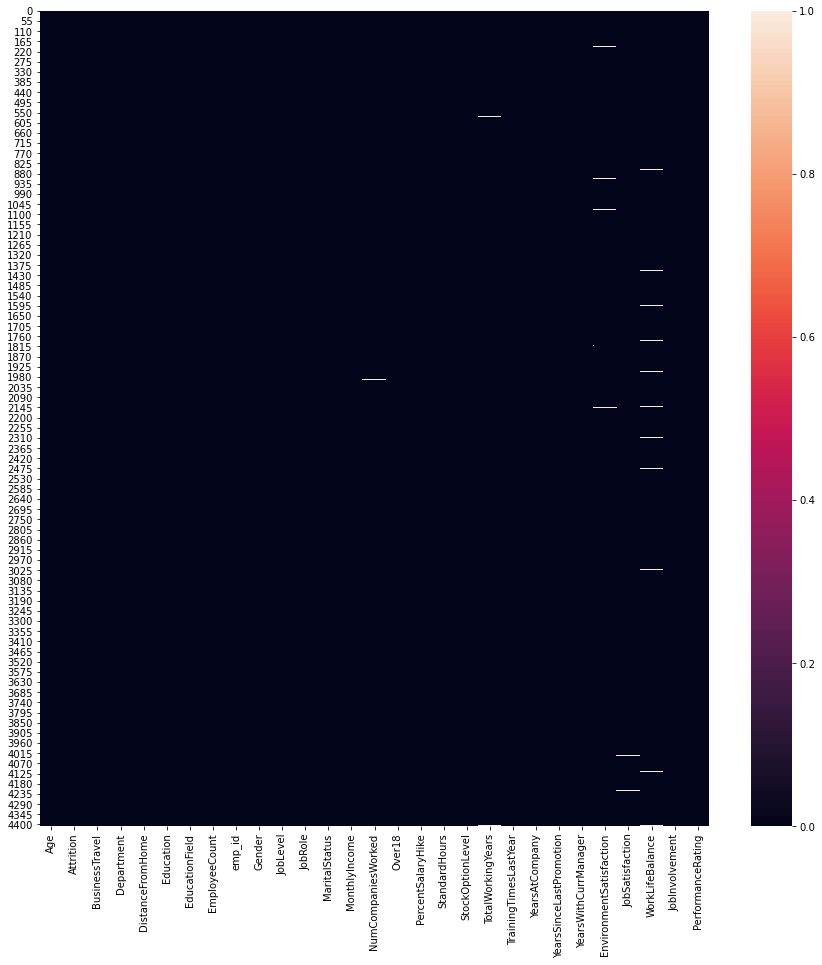

In [ ]:
fig =plt.figure(figsize=(15,15))
ax = plt.gca()
sns.heatmap(is_null_df,ax=ax)

### Existen algunos valores nulos, ahora vemos en porcentajes

In [ ]:
null_percentages = (is_null_df.sum()/is_null_df.shape[0])*100
null_percentages

Age                        0.000000
Attrition                  0.000000
BusinessTravel             0.000000
Department                 0.000000
DistanceFromHome           0.000000
Education                  0.000000
EducationField             0.000000
EmployeeCount              0.000000
emp_id                     0.000000
Gender                     0.000000
JobLevel                   0.000000
JobRole                    0.000000
MaritalStatus              0.000000
MonthlyIncome              0.000000
NumCompaniesWorked         0.430839
Over18                     0.000000
PercentSalaryHike          0.000000
StandardHours              0.000000
StockOptionLevel           0.000000
TotalWorkingYears          0.204082
TrainingTimesLastYear      0.000000
YearsAtCompany             0.000000
YearsSinceLastPromotion    0.000000
YearsWithCurrManager       0.000000
EnvironmentSatisfaction    0.566893
JobSatisfaction            0.453515
WorkLifeBalance            0.861678
JobInvolvement             0

### Modificando los valores nulos

In [ ]:
no_nan_df = df
no_nan_df.loc[:,"NumCompaniesWorked"] = no_nan_df.loc[:,"NumCompaniesWorked"].fillna(np.round(no_nan_df.loc[:,"NumCompaniesWorked"].mean(),0))
no_nan_df.loc[:,"TotalWorkingYears"] = no_nan_df.loc[:,"TotalWorkingYears"].fillna(np.round(no_nan_df.loc[:,"TotalWorkingYears"].mean(),0))
no_nan_df.loc[:,"EnvironmentSatisfaction"] = no_nan_df.loc[:,"EnvironmentSatisfaction"].fillna(stats.mode(no_nan_df.loc[:,"EnvironmentSatisfaction"])[0][0])
no_nan_df.loc[:,"JobSatisfaction"] = no_nan_df.loc[:,"JobSatisfaction"].fillna(stats.mode(no_nan_df.loc[:,"JobSatisfaction"])[0][0])
no_nan_df.loc[:,"WorkLifeBalance"] = no_nan_df.loc[:,"WorkLifeBalance"].fillna(stats.mode(no_nan_df.loc[:,"WorkLifeBalance"])[0][0])


In [ ]:
no_nan_df.describe()

Age  DistanceFromHome    Education  EmployeeCount       emp_id  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4410.000000        4410.000000   
mean      2.063946   65029.312925            2.696145          15.209524   
std       1.106689   47068.888559            2.493577           3.659108   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49190.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StandardHours  ...  TotalWorkingYears  TrainingTimesLastYear  \
count         4410.0  ...        4410.000000            4410.000000   
mean             8.0  ...          11.279365               2.799320   
std              0.0  ...           7.774286               1.288978   
min              8.0  ...           0.000000               0.000000   
25%              8.0  ...           6.000000               2.000000   
50%              8.0  ...          10.000000               3.000000   
75%              8.0  ...          15.000000               3.000000   
max              8.0  ...          40.000000               6.000000   

       YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  \
count     4410.000000              4410.000000           4410.000000   
mean         7.008163                 2.187755              4.123129   
std          6.125135                 3.221699              3.567327   
min          0.000000                 0.000000              0.000000   
25%          3.000000                 0.000000              2.000000   
50%          5.000000                 1.000000              3.000000   
75%          9.000000                 3.000000              7.000000   
max         40.000000                15.000000             17.000000   

       EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
count              4410.000000      4410.000000      4410.000000   
mean                  2.725170         2.734014         2.763492   
std                   1.089852         1.102071         0.703541   
min                   1.000000         1.000000         1.000000   
25%                   2.000000         2.000000         2.000000   
50%                   3.000000         3.000000         3.000000   
75%                   4.000000         4.000000         3.000000   
max                   4.000000         4.000000         4.000000   

       JobInvolvement  PerformanceRating  
count     4410.000000        4410.000000  
mean         2.729932           3.153741  
std          0.711400           0.360742  
min          1.000000           3.000000  
25%          2.000000           3.000000  
50%          3.000000           3.000000  
75%          3.000000           3.000000  
max          4.000000           4.000000  

[8 rows x 21 columns]

In [ ]:
is_null_df_nan = no_nan_df.isnull()

In [ ]:
#fig =plt.figure(figsize=(15,15))
#ax = plt.gca()
#sns.heatmap(is_null_df_nan,ax=ax)

### J)Separando variables numéricas y categoricas

### Se cambia los valores de tipo de categorico de "Attrition" a binario(número)

In [ ]:
df.head(5)

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  emp_id  Gender  ...  \
0          2  Life Sciences              1       1  Female  ...   
1          1  Life Sciences              1       2  Female  ...   
2          4          Other              1       3    Male  ...   
3          5  Life Sciences              1       4    Male  ...   
4          1        Medical              1       5    Male  ...   

   TotalWorkingYears TrainingTimesLastYear YearsAtCompany  \
0                1.0                     6              1   
1                6.0                     3              5   
2                5.0                     2              5   
3               13.0                     5              8   
4                9.0                     2              6   

   YearsSinceLastPromotion  YearsWithCurrManager EnvironmentSatisfaction  \
0                        0                     0                     3.0   
1                        1                     4                     3.0   
2                        0                     3                     2.0   
3                        7                     5                     4.0   
4                        0                     4                     4.0   

   JobSatisfaction  WorkLifeBalance  JobInvolvement  PerformanceRating  
0              4.0              2.0               3                  3  
1              2.0              4.0               2                  4  
2              2.0              1.0               3                  3  
3              4.0              3.0               2                  3  
4              1.0              3.0               3                  3  

[5 rows x 29 columns]

In [ ]:
#data_luc.head(5)

In [ ]:
cambio_a_binario = {
           'Yes': '1',
           'No': '0'}

In [ ]:
df['Attrition'] = df['Attrition'].map(cambio_a_binario)

In [ ]:
df.head(5)

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51         0      Travel_Rarely                   Sales                 6   
1   31         1  Travel_Frequently  Research & Development                10   
2   32         0  Travel_Frequently  Research & Development                17   
3   38         0         Non-Travel  Research & Development                 2   
4   32         0      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  emp_id  Gender  ...  \
0          2  Life Sciences              1       1  Female  ...   
1          1  Life Sciences              1       2  Female  ...   
2          4          Other              1       3    Male  ...   
3          5  Life Sciences              1       4    Male  ...   
4          1        Medical              1       5    Male  ...   

   TotalWorkingYears TrainingTimesLastYear YearsAtCompany  \
0                1.0                     6              1   
1                6.0                     3              5   
2                5.0                     2              5   
3               13.0                     5              8   
4                9.0                     2              6   

   YearsSinceLastPromotion  YearsWithCurrManager EnvironmentSatisfaction  \
0                        0                     0                     3.0   
1                        1                     4                     3.0   
2                        0                     3                     2.0   
3                        7                     5                     4.0   
4                        0                     4                     4.0   

   JobSatisfaction  WorkLifeBalance  JobInvolvement  PerformanceRating  
0              4.0              2.0               3                  3  
1              2.0              4.0               2                  4  
2              2.0              1.0               3                  3  
3              4.0              3.0               2                  3  
4              1.0              3.0               3                  3  

[5 rows x 29 columns]

In [ ]:
  df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
emp_id                       int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating   

### "Attrition", no es de tipo numerico, entonces cambiamos

In [ ]:
df['Attrition']=pd.to_numeric(df['Attrition'])

In [ ]:
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
emp_id                       int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating   

In [ ]:
num_cols_df = df.loc[:,df.dtypes.astype(str).isin(["int64","float64"])]
sin_df = df.loc[:,df.columns.difference(pd.Index(["Attrition"]))]

### Ahora separando numéricos de categóricos

In [ ]:
NUMERICAL_TYPES = ["float64","int64"]
# Escribe tu código acá
#num_df = df.loc[:,df.columns[df.dtypes.isin(NUMERICAL_TYPES)]]
#cat_df = df.loc[:,df.columns[~df.dtypes.isin(NUMERICAL_TYPES)]]
num_df = df.loc[:,sin_df.columns[(sin_df.dtypes==("float64"))|(sin_df.dtypes==("int64"))]]
cat_df = df.loc[:,sin_df.columns[~((sin_df.dtypes==("float64"))|(sin_df.dtypes==("int64")))]]


In [ ]:
display(num_df)
display(cat_df)

Age  DistanceFromHome  Education  EmployeeCount  \
0      51                 6          2              1   
1      31                10          1              1   
2      32                17          4              1   
3      38                 2          5              1   
4      32                10          1              1   
...   ...               ...        ...            ...   
4405   42                 5          4              1   
4406   29                 2          4              1   
4407   25                25          2              1   
4408   42                18          2              1   
4409   40                28          3              1   

      EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
0                         3.0               3         1              4.0   
1                         3.0               2         1              2.0   
2                         2.0               3         4              2.0   
3                         4.0               2         3              4.0   
4                         4.0               3         1              1.0   
...                       ...             ...       ...              ...   
4405                      4.0               3         1              1.0   
4406                      4.0               2         1              4.0   
4407                      1.0               3         2              3.0   
4408                      4.0               2         1              1.0   
4409                      1.0               4         2              3.0   

      MonthlyIncome  NumCompaniesWorked  ...  PerformanceRating  \
0            131160                 1.0  ...                  3   
1             41890                 0.0  ...                  4   
2            193280                 1.0  ...                  3   
3             83210                 3.0  ...                  3   
4             23420                 4.0  ...                  3   
...             ...                 ...  ...                ...   
4405          60290                 3.0  ...                  3   
4406          26790                 2.0  ...                  3   
4407          37020                 0.0  ...                  4   
4408          23980                 0.0  ...                  3   
4409          54680                 0.0  ...                  3   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
0                 8                 0                1.0   
1                 8                 1                6.0   
2                 8                 3                5.0   
3                 8                 3               13.0   
4                 8                 2                9.0   
...             ...               ...                ...   
4405              8                 1               10.0   
4406              8                 0               10.0   
4407              8                 0                5.0   
4408              8                 1               10.0   
4409              8                 0               11.0   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                         6              2.0               1   
1                         3              4.0               5   
2                         2              1.0               5   
3                         5              3.0               8   
4                         2              3.0               6   
...                     ...              ...             ...   
4405                      5              3.0               3   
4406                      2              3.0               3   
4407                      4              3.0               4   
4408                      2              3.0               9   
4409                      6              3.0              21   

      YearsSinceLastPromotion  YearsWithCurrManager  emp_id  
0                           0                     0

BusinessTravel              Department EducationField  Gender  \
0         Travel_Rarely                   Sales  Life Sciences  Female   
1     Travel_Frequently  Research & Development  Life Sciences  Female   
2     Travel_Frequently  Research & Development          Other    Male   
3            Non-Travel  Research & Development  Life Sciences    Male   
4         Travel_Rarely  Research & Development        Medical    Male   
...                 ...                     ...            ...     ...   
4405      Travel_Rarely  Research & Development        Medical  Female   
4406      Travel_Rarely  Research & Development        Medical    Male   
4407      Travel_Rarely  Research & Development  Life Sciences    Male   
4408      Travel_Rarely                   Sales        Medical    Male   
4409      Travel_Rarely  Research & Development        Medical    Male   

                        JobRole MaritalStatus Over18  
0     Healthcare Representative       Married      Y  
1            Research Scientist        Single      Y  
2               Sales Executive       Married      Y  
3               Human Resources       Married      Y  
4               Sales Executive        Single      Y  
...                         ...           ...    ...  
4405         Research Scientist        Single      Y  
4406      Laboratory Technician      Divorced      Y  
4407            Sales Executive       Married      Y  
4408      Laboratory Technician      Divorced      Y  
4409      Laboratory Technician      Divorced      Y  

[4410 rows x 7 columns]

In [ ]:
num_df.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'emp_id'],
      dtype='object')

### K)Trabajando las variables numéricas
### Revisando contenido

In [ ]:
num_df.head(10)

Age  DistanceFromHome  Education  EmployeeCount  EnvironmentSatisfaction  \
0   51                 6          2              1                      3.0   
1   31                10          1              1                      3.0   
2   32                17          4              1                      2.0   
3   38                 2          5              1                      4.0   
4   32                10          1              1                      4.0   
5   46                 8          3              1                      3.0   
6   28                11          2              1                      1.0   
7   29                18          3              1                      1.0   
8   31                 1          3              1                      2.0   
9   25                 7          4              1                      2.0   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0               3         1              4.0         131160   
1               2         1              2.0          41890   
2               3         4              2.0         193280   
3               2         3              4.0          83210   
4               3         1              1.0          23420   
5               3         4              2.0          40710   
6               3         2              3.0          58130   
7               3         2              2.0          31430   
8               3         3              4.0          20440   
9               3         4              1.0         134640   

   NumCompaniesWorked  ...  PerformanceRating  StandardHours  \
0                 1.0  ...                  3              8   
1                 0.0  ...                  4              8   
2                 1.0  ...                  3              8   
3                 3.0  ...                  3              8   
4                 4.0  ...                  3              8   
5                 3.0  ...                  3              8   
6                 2.0  ...                  4              8   
7                 2.0  ...                  4              8   
8                 0.0  ...                  4              8   
9                 1.0  ...                  3              8   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                1.0                      6   
1                 1                6.0                      3   
2                 3                5.0                      2   
3                 3               13.0                      5   
4                 2                9.0                      2   
5                 0               28.0                      5   
6                 1                5.0                      2   
7                 3               10.0                      2   
8                 0               10.0                      2   
9                 1                6.0                      2   

   WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  \
0              2.0               1                        0   
1              4.0               5                        1   
2              1.0               5                        0   
3              3.0               8                        7   
4              3.0               6                        0   
5              2.0               7                        7   
6              1.0               0                        0   
7              3.0               0                        0   
8              3.0               9                        7   
9              3.0               6                        1   

   YearsWithCurrManager  emp_id  
0                     0       1  
1                     4       2  
2                     3       3  
3                     5       4  
4                     4       5  
5                     7       6  
6                     0       7  
7                     0       8  
8                 

In [ ]:
num_df.tail(20)

Age  DistanceFromHome  Education  EmployeeCount  \
4390   32                13          4              1   
4391   32                23          1              1   
4392   39                26          4              1   
4393   32                 2          4              1   
4394   41                29          3              1   
4395   40                 2          3              1   
4396   45                18          1              1   
4397   31                 7          4              1   
4398   33                 2          4              1   
4399   34                26          3              1   
4400   37                22          5              1   
4401   45                21          1              1   
4402   37                 2          3              1   
4403   39                22          3              1   
4404   29                 4          3              1   
4405   42                 5          4              1   
4406   29                 2          4              1   
4407   25                25          2              1   
4408   42                18          2              1   
4409   40                28          3              1   

      EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
4390                      3.0               2         3              2.0   
4391                      4.0               3         3              3.0   
4392                      3.0               4         2              3.0   
4393                      3.0               2         4              4.0   
4394                      3.0               2         2              1.0   
4395                      1.0               2         1              4.0   
4396                      3.0               2         2              4.0   
4397                      2.0               4         1              3.0   
4398                      3.0               3         1              4.0   
4399                      4.0               2         1              1.0   
4400                      3.0               3         2              1.0   
4401                      1.0               2         3              3.0   
4402                      1.0               3         1              3.0   
4403                      3.0               3         1              3.0   
4404                      3.0               2         2              4.0   
4405                      4.0               3         1              1.0   
4406                      4.0               2         1              4.0   
4407                      1.0               3         2              3.0   
4408                      4.0               2         1              1.0   
4409                      1.0               4         2              3.0   

      MonthlyIncome  NumCompaniesWorked  ...  PerformanceRating  \
4390          85640                 2.0  ...                  3   
4391          24680                 0.0  ...                  3   
4392          81610                 7.0  ...                  3   
4393          21090                 0.0  ...                  3   
4394          52940                 2.0  ...                  3   
4395          27180                 3.0  ...                  3   
4396          58110                 0.0  ...                  3   
4397          24370                 9.0  ...                  3   
4398          27660                 1.0  ...                  3   
4399         190380                 6.0  ...                  3   
4400          30550                 2.0  ...                  3   
4401          22890                 4.0  ...                  3   
4402          40010                 6.0  ...                  3   
4403         129650                 0.0  ...                  3   
4404          35390                 1.0  ...                  3   
4405          60290                 3.0  ...                  3   
4406          26790                 2.0  ...                  3   
4407 

In [ ]:
num_df.loc[:,['StandardHours', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear']]

StandardHours  StockOptionLevel  TotalWorkingYears  \
0                 8                 0                1.0   
1                 8                 1                6.0   
2                 8                 3                5.0   
3                 8                 3               13.0   
4                 8                 2                9.0   
...             ...               ...                ...   
4405              8                 1               10.0   
4406              8                 0               10.0   
4407              8                 0                5.0   
4408              8                 1               10.0   
4409              8                 0               11.0   

      TrainingTimesLastYear  
0                         6  
1                         3  
2                         2  
3                         5  
4                         2  
...                     ...  
4405                      5  
4406                      2  
4407                      4  
4408                      2  
4409                      6  

[4410 rows x 4 columns]

### Inspección de valores. Conclusiones preliminares
#### Estas variables parecen tener los valores esperados:
       'Age', 'DistanceFromHome','Education', 'emp_id',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'
#### En cambio estas son muy particulares
    'EmployeeCount', es una variable en la cual en todos los casos vale 1
    'StandardHours', es una variable en la cual en todos los casos vale 8


### Analizando en mayor detalle

In [ ]:
num_df.describe()

Age  DistanceFromHome    Education  EmployeeCount  \
count  4410.000000       4410.000000  4410.000000         4410.0   
mean     36.923810          9.192517     2.912925            1.0   
std       9.133301          8.105026     1.023933            0.0   
min      18.000000          1.000000     1.000000            1.0   
25%      30.000000          2.000000     2.000000            1.0   
50%      36.000000          7.000000     3.000000            1.0   
75%      43.000000         14.000000     4.000000            1.0   
max      60.000000         29.000000     5.000000            1.0   

       EnvironmentSatisfaction  JobInvolvement     JobLevel  JobSatisfaction  \
count              4410.000000     4410.000000  4410.000000      4410.000000   
mean                  2.725170        2.729932     2.063946         2.734014   
std                   1.089852        0.711400     1.106689         1.102071   
min                   1.000000        1.000000     1.000000         1.000000   
25%                   2.000000        2.000000     1.000000         2.000000   
50%                   3.000000        3.000000     2.000000         3.000000   
75%                   4.000000        3.000000     3.000000         4.000000   
max                   4.000000        4.000000     5.000000         4.000000   

       MonthlyIncome  NumCompaniesWorked  ...  PerformanceRating  \
count    4410.000000         4410.000000  ...        4410.000000   
mean    65029.312925            2.696145  ...           3.153741   
std     47068.888559            2.493577  ...           0.360742   
min     10090.000000            0.000000  ...           3.000000   
25%     29110.000000            1.000000  ...           3.000000   
50%     49190.000000            2.000000  ...           3.000000   
75%     83800.000000            4.000000  ...           3.000000   
max    199990.000000            9.000000  ...           4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         4410.0       4410.000000        4410.000000   
mean             8.0          0.793878          11.279365   
std              0.0          0.851883           7.774286   
min              8.0          0.000000           0.000000   
25%              8.0          0.000000           6.000000   
50%              8.0          1.000000          10.000000   
75%              8.0          1.000000          15.000000   
max              8.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            4410.000000      4410.000000     4410.000000   
mean                2.799320         2.763492        7.008163   
std                 1.288978         0.703541        6.125135   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsSinceLastPromotion  YearsWithCurrManager       emp_id  
count              4410.000000           4410.000000  4410.000000  
mean                  2.187755              4.123129  2205.500000  
std                   3.221699              3.567327  1273.201673  
min                   0.000000              0.000000     1.000000  
25%                   0.000000              2.000000  1103.250000  
50%                   1.000000              3.000000  2205.500000  
75%                   3.000000              7.000000  3307.750000  
max                  15.000000             17.000000  4410.000000  

[8 rows x 21 columns]

In [ ]:
num_df.loc[:,['StandardHours', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear']].describe()

StandardHours  StockOptionLevel  TotalWorkingYears  \
count         4410.0       4410.000000        4410.000000   
mean             8.0          0.793878          11.279365   
std              0.0          0.851883           7.774286   
min              8.0          0.000000           0.000000   
25%              8.0          0.000000           6.000000   
50%              8.0          1.000000          10.000000   
75%              8.0          1.000000          15.000000   
max              8.0          3.000000          40.000000   

       TrainingTimesLastYear  
count            4410.000000  
mean                2.799320  
std                 1.288978  
min                 0.000000  
25%                 2.000000  
50%                 3.000000  
75%                 3.000000  
max                 6.000000

### Analizando estadisticos para cada variable
#### variables con Valores NaN:
                       NumCompaniesWorked
                       TotalWorkingYears
                       EnvironmentSatisfaction
                       JobSatisfaction
                       WorkLifeBalance

In [ ]:
%matplotlib inline


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
sns.set()

### Un mapa de temperaturas de correlación de variables

<AxesSubplot:>

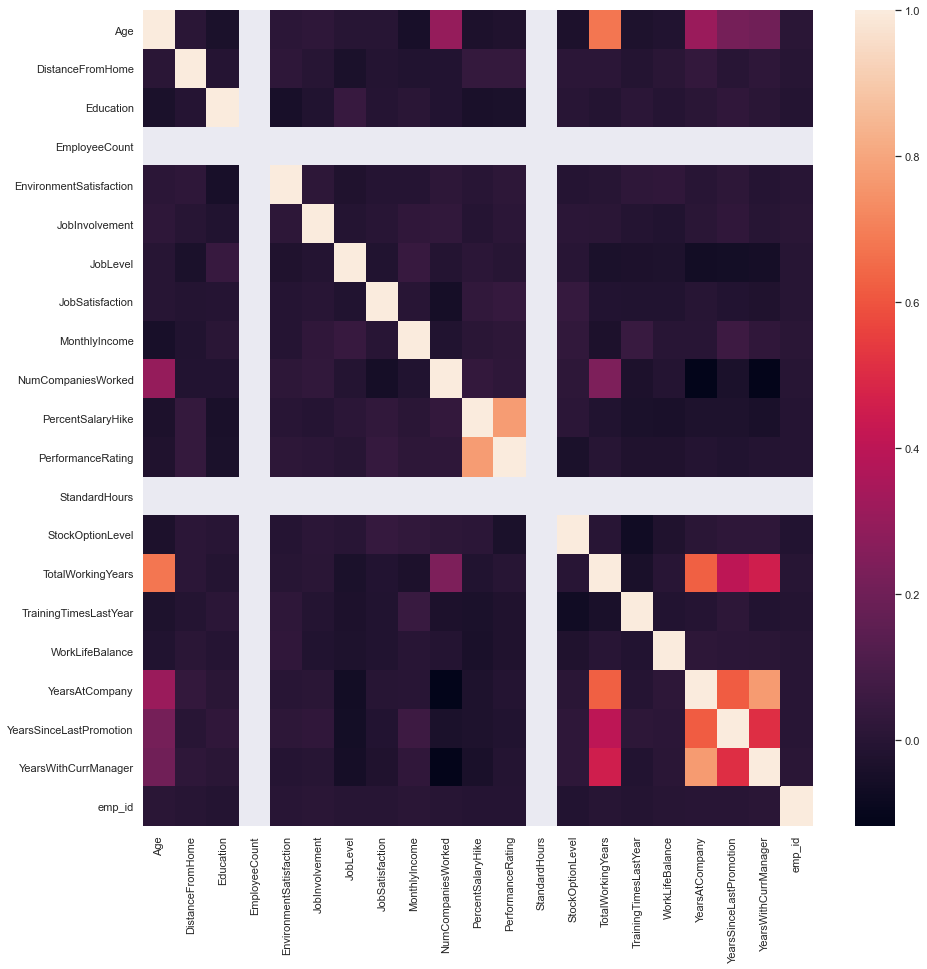

In [ ]:
# A continuación un mapa de temperaturas de correlación entre las variables numéricas
fig = plt.figure(figsize=(15,15))
ax= plt.gca()
sns.heatmap(num_df.corr(),ax=ax)


### Un análisis de algunas de estos resultados
    El (porcentaje de aumento salarial) esta relacionado con (clasificacion de rendimiento)
    Otra:  El (numero de años en la compañía) con (numeros de años con su jefe)
    Algo peculiar es la relación de (Empleado conteo) y (horas estándar), porque son variables con un único valor

### A continuación se introduce algunas variables categoricas y su comportamiento con las numericas

#### Primero con sexo

In [ ]:
sns.pairplot(pd.concat([num_df,cat_df.loc[:,"Gender"]],axis=1), hue="Gender")

#### Introduciendo otra variable "MaritalStatus"

In [ ]:
sns.pairplot(pd.concat([num_df,cat_df.loc[:,"MaritalStatus"]],axis=1), hue="MaritalStatus")

### Ahora con la variable "attrition", que es importante para el modelo que se plantea

C:\Users\lucio\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\lucio\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\lucio\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\lucio\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


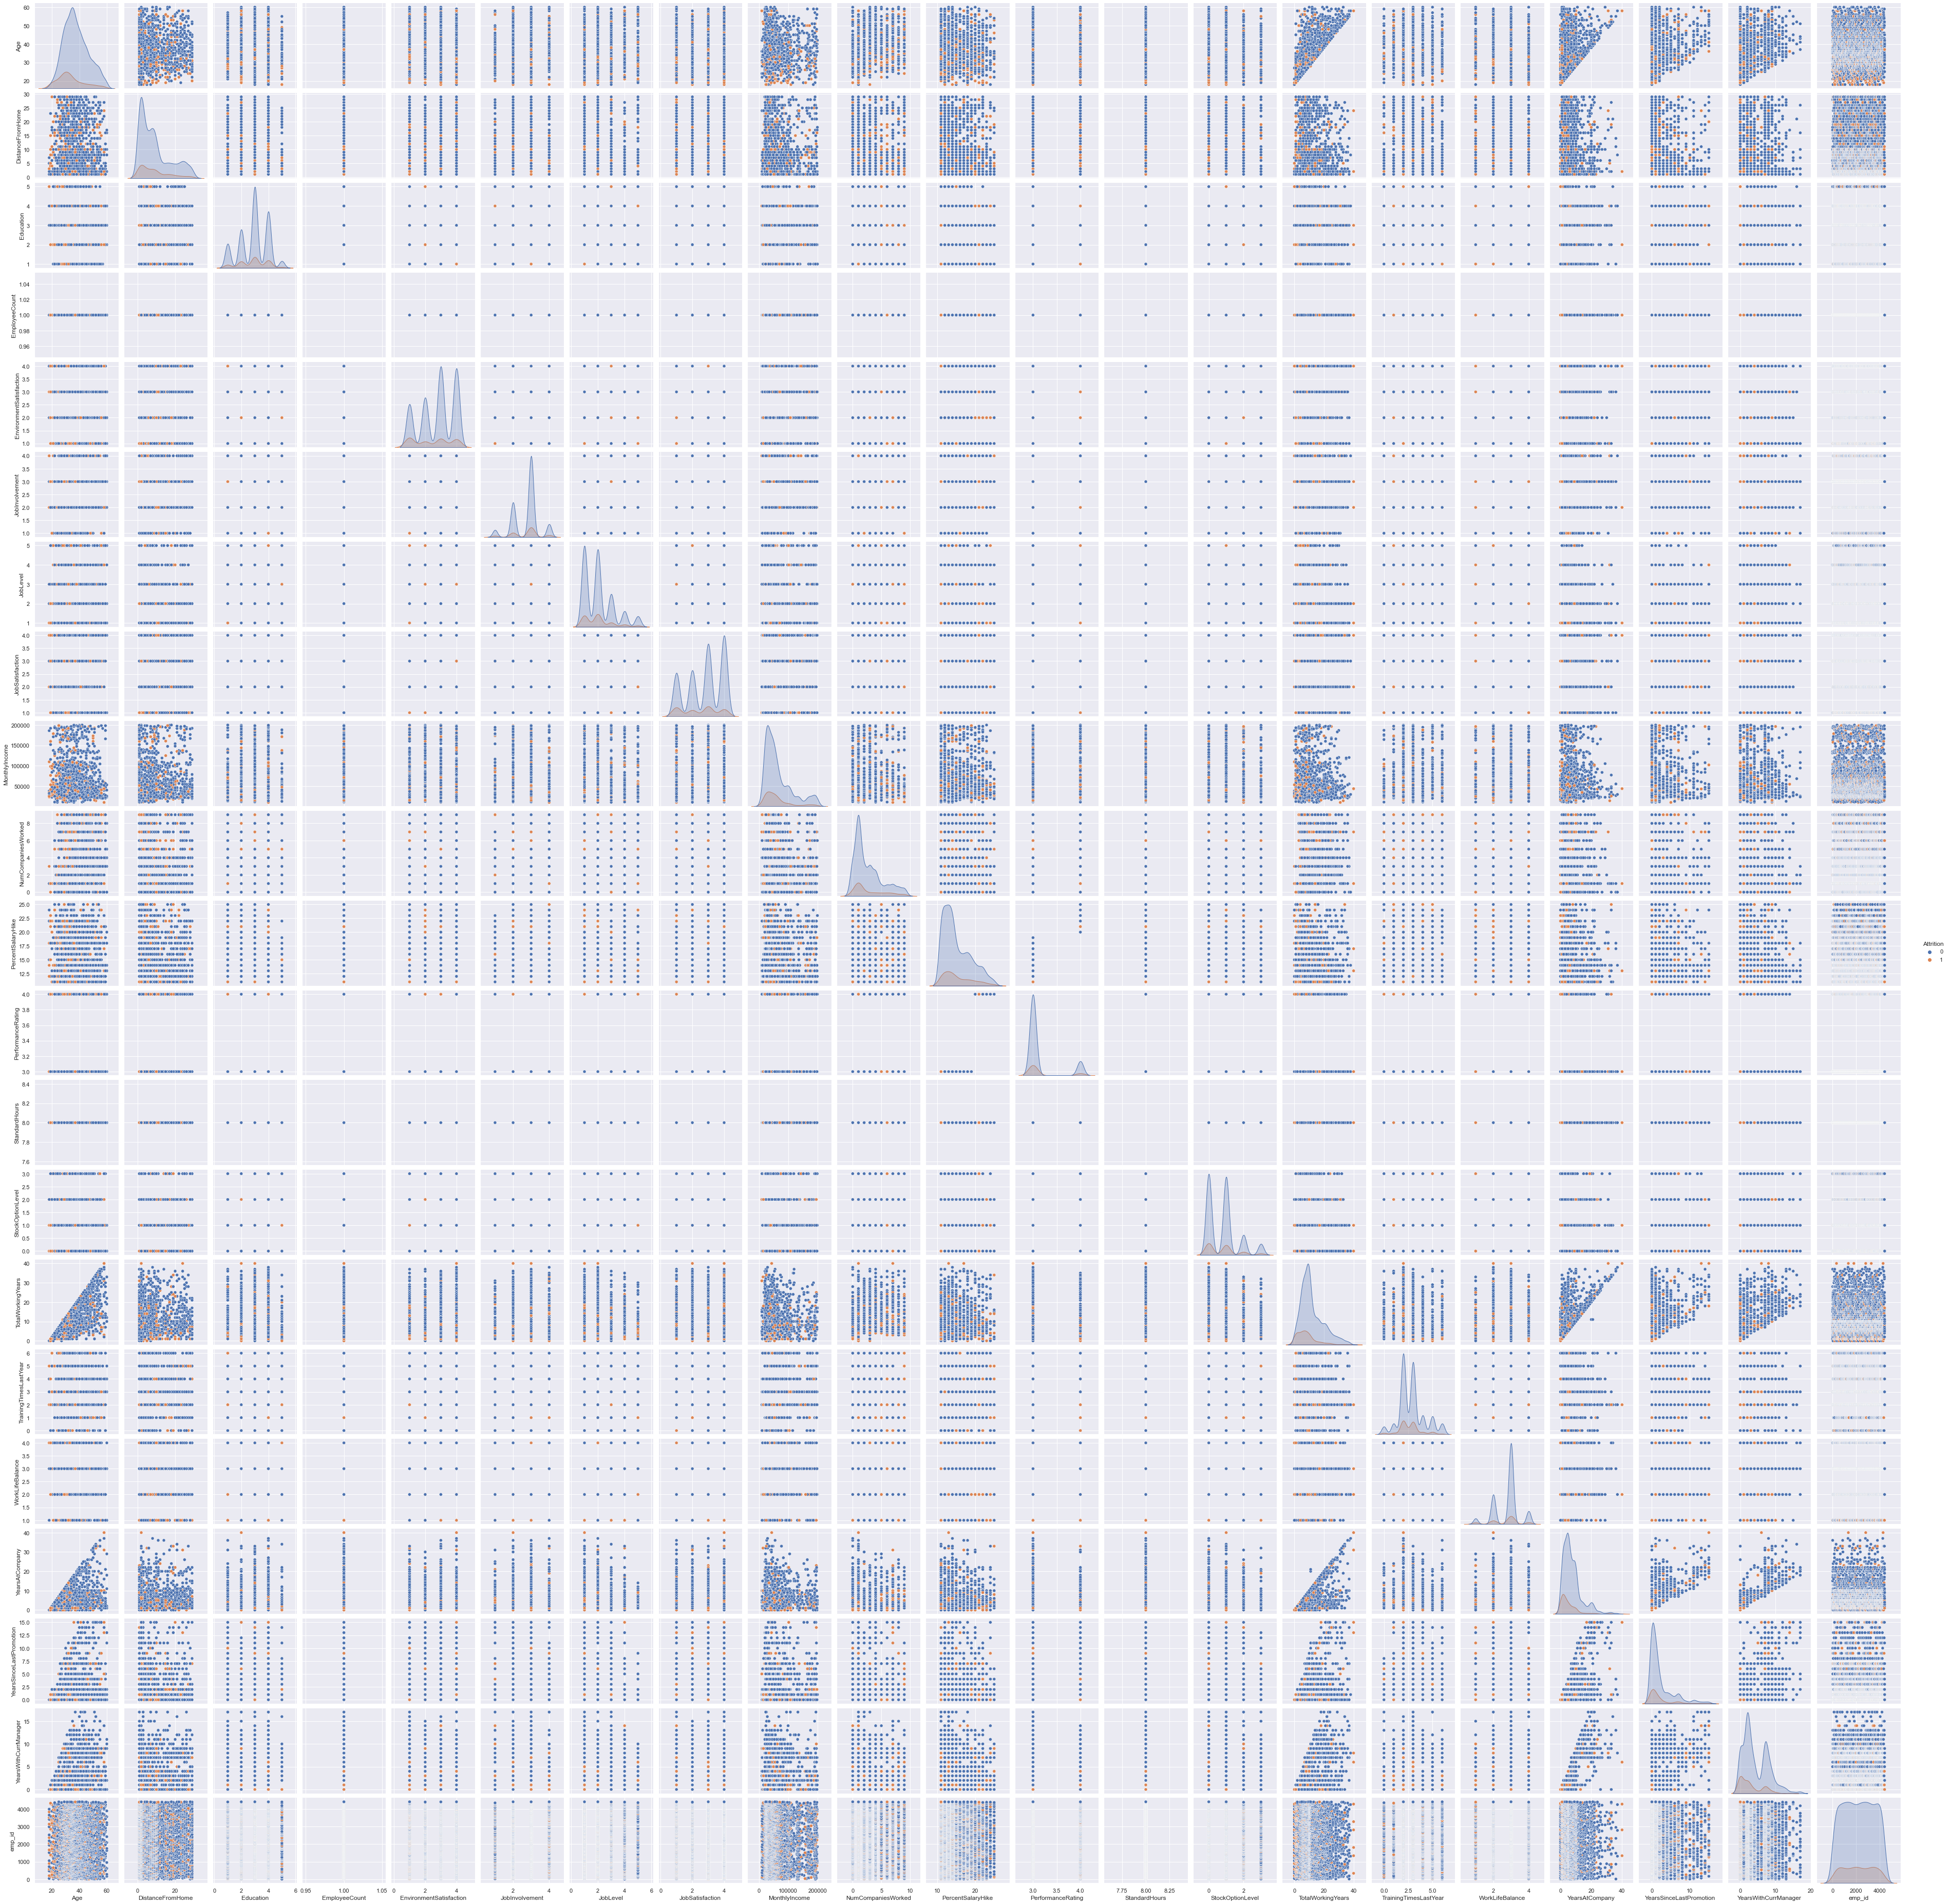

In [ ]:
#sns.pairplot(pd.concat([num_df,cat_df.loc[:,"Attrition"]],axis=1), hue="Attrition")
#sns.pairplot(pd.concat([num_df],axis=1), hue="Attrition")
sns.pairplot(pd.concat([num_df,num_cols_df.loc[:,"Attrition"]],axis=1),hue ="Attrition")

In [ ]:
# Ver los valores nulos

In [ ]:
#fign = plt.figure(figsize=(15,15))
#ax= plt.gca()
#sns.heatmap(num_df.isnull(),ax=ax)

### Ver el grafico de la distribución de los valores

<ipython-input-145-ca638a67ee22>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  num_df.hist(ax=ax,bins=20)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'StandardHours'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>],
       [<AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'WorkLifeBalance'}>,
        <AxesSubpl

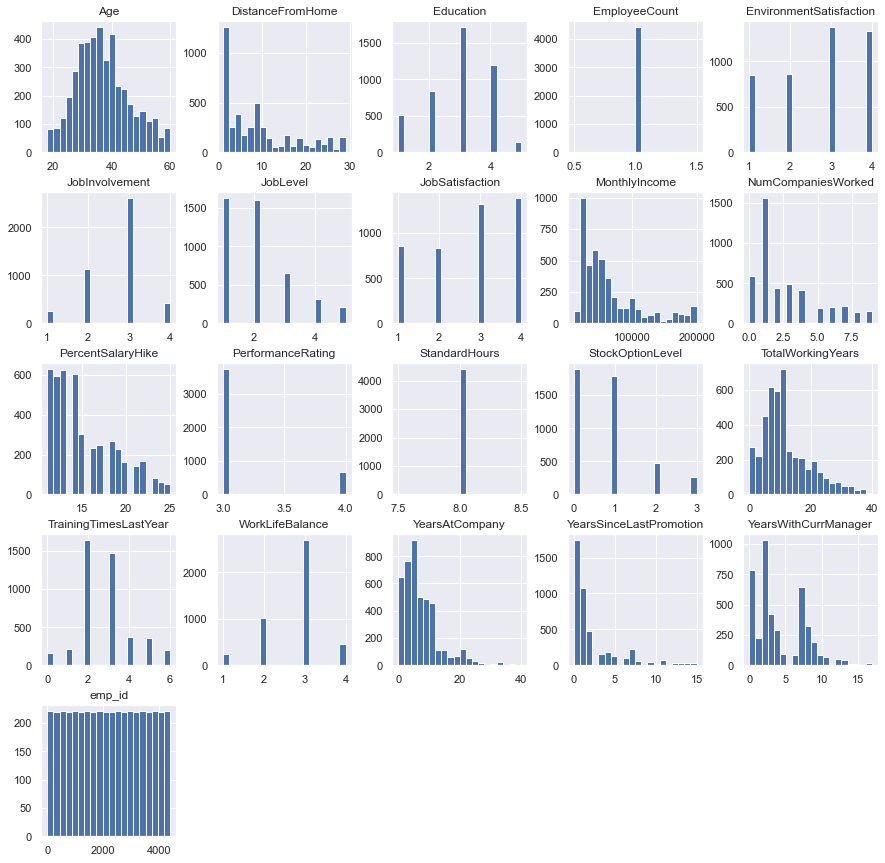

In [ ]:
fig = plt.figure(figsize=(15,15))
ax =plt.gca()
num_df.hist(ax=ax,bins=20)

In [ ]:
#Graficar las cajas


### Graficar cajas

<AxesSubplot:>

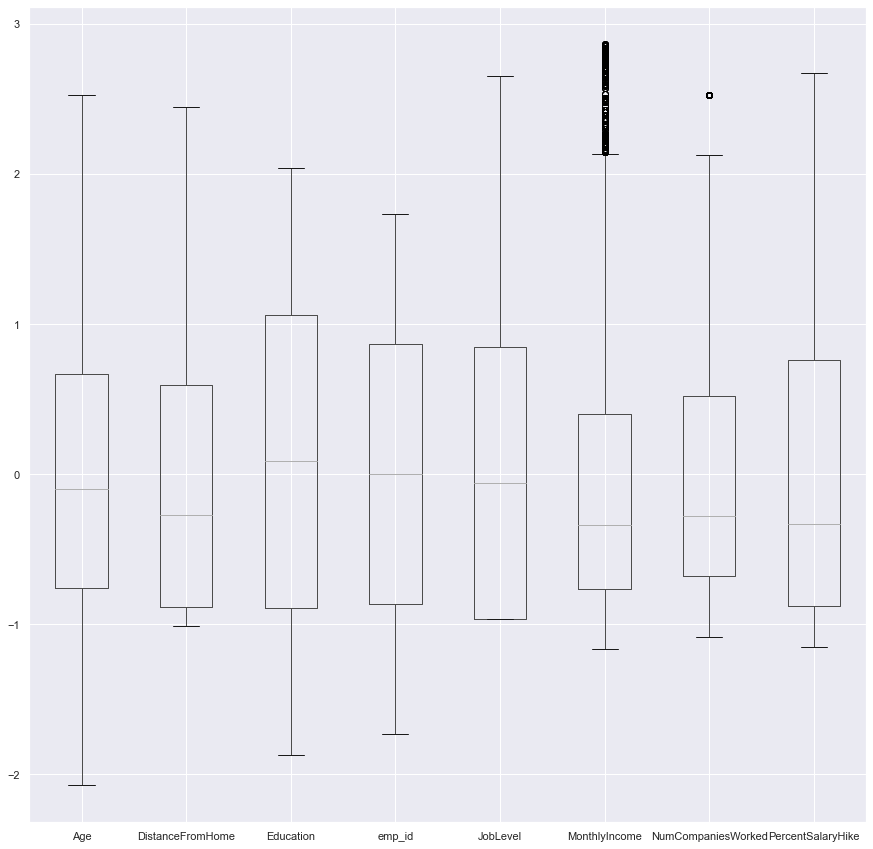

In [ ]:
from sklearn.preprocessing import scale
fig = plt.figure(figsize=(15,15))
ax =plt.gca()
pd.DataFrame(scale(num_df.loc[:,['Age', 'DistanceFromHome','Education', 'emp_id','JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike']]),columns=['Age', 'DistanceFromHome','Education', 'emp_id','JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike']).boxplot(ax=ax)

<AxesSubplot:>

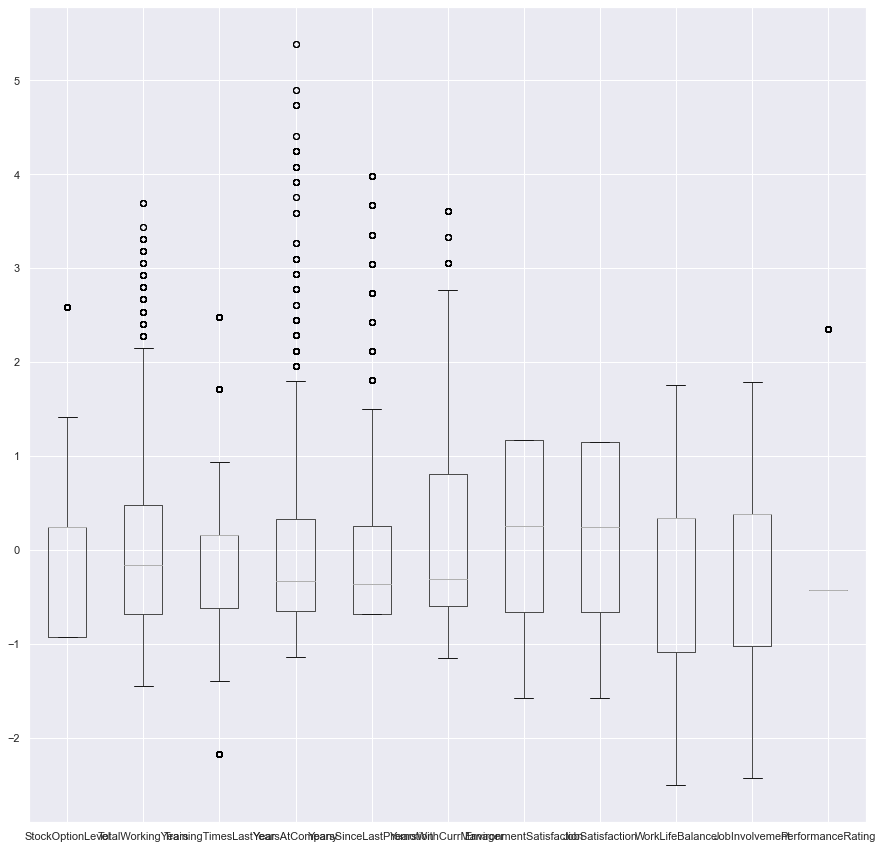

In [ ]:
from sklearn.preprocessing import scale
fig = plt.figure(figsize=(15,15))
ax =plt.gca()
pd.DataFrame(scale(num_df.loc[:,['StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']]),columns=['StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']).boxplot(ax=ax)

### Aplicar los cambios de los casos atípicos

In [ ]:
primer_cuartil=num_df.quantile(0.25)
tercer_cuartil=num_df.quantile(0.75)
iqr=tercer_cuartil-primer_cuartil
no_outliers_cols=[]
for col in num_df.columns:
   sup_limite=(num_df[col])<=tercer_cuartil[col]+1.5*iqr.loc[col]
   inf_limite=(num_df[col])>=primer_cuartil[col]+1.5*iqr.loc[col]
   no_outliers_cols.append(num_df.loc[sup_limite & inf_limite,col])

In [ ]:
num_df.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'emp_id'],
      dtype='object')

In [ ]:
#Aplicar una transformación logaritmica

### L) Trabajando con variables categoricas

In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
#Analisis de las variables categoricas

In [ ]:
cat_df.head(10)

BusinessTravel              Department EducationField      Gender  \
0      Travel_Rarely                   Sales  Life Sciences      Female   
1  Travel_Frequently  Research & Development  Life Sciences      Female   
2  Travel_Frequently  Research & Development          Other        Male   
3         Non-Travel  Research & Development  Life Sciences        Male   
4      Travel_Rarely  Research & Development        Medical        Male   
5      Travel_Rarely  Research & Development  Life Sciences      Female   
6      Travel_Rarely  Research & Development        Medical        Male   
7      Travel_Rarely  Research & Development  Life Sciences        Male   
8      Travel_Rarely  Research & Development  Life Sciences        Male   
9         Non-Travel  Research & Development        Medical  Female       

                     JobRole MaritalStatus Over18  
0  Healthcare Representative       Married      Y  
1         Research Scientist        Single      Y  
2            Sales Executive       Married      Y  
3            Human Resources       Married      Y  
4            Sales Executive        Single      Y  
5          Research Director       Married      Y  
6            Sales Executive        Single      Y  
7            Sales Executive       Married      Y  
8      Laboratory Technician       Married      Y  
9      Laboratory Technician      Divorced      Y

In [ ]:
cat_df.tail(20)

BusinessTravel              Department EducationField  Gender  \
4390      Travel_Rarely         Human Resources  Life Sciences  Female   
4391      Travel_Rarely                   Sales  Life Sciences    Male   
4392      Travel_Rarely                   Sales  Life Sciences    Male   
4393         Non-Travel                   Sales      Marketing    Male   
4394      Travel_Rarely                   Sales  Life Sciences  Female   
4395      Travel_Rarely  Research & Development  Life Sciences    Male   
4396      Travel_Rarely  Research & Development  Life Sciences  Female   
4397  Travel_Frequently  Research & Development        Medical    Male   
4398      Travel_Rarely  Research & Development  Life Sciences  Female   
4399      Travel_Rarely  Research & Development          Other  Female   
4400      Travel_Rarely  Research & Development        Medical  Female   
4401  Travel_Frequently                   Sales      Marketing    Male   
4402  Travel_Frequently                   Sales      Marketing    Male   
4403  Travel_Frequently  Research & Development        Medical  Female   
4404      Travel_Rarely                   Sales          Other  Female   
4405      Travel_Rarely  Research & Development        Medical  Female   
4406      Travel_Rarely  Research & Development        Medical    Male   
4407      Travel_Rarely  Research & Development  Life Sciences    Male   
4408      Travel_Rarely                   Sales        Medical    Male   
4409      Travel_Rarely  Research & Development        Medical    Male   

                        JobRole MaritalStatus Over18  
4390     Manufacturing Director       Married      Y  
4391  Healthcare Representative        Single      Y  
4392          Research Director      Divorced      Y  
4393         Research Scientist       Married      Y  
4394      Laboratory Technician      Divorced      Y  
4395     Manufacturing Director      Divorced      Y  
4396       Sales Representative       Married      Y  
4397         Research Scientist      Divorced      Y  
4398            Sales Executive       Married      Y  
4399            Sales Executive       Married      Y  
4400     Manufacturing Director       Married      Y  
4401         Research Scientist       Married      Y  
4402      Laboratory Technician      Divorced      Y  
4403     Manufacturing Director        Single      Y  
4404            Human Resources        Single      Y  
4405         Research Scientist        Single      Y  
4406      Laboratory Technician      Divorced      Y  
4407            Sales Executive       Married      Y  
4408      Laboratory Technician      Divorced      Y  
4409      Laboratory Technician      Divorced      Y

### Graficando los viajes de negocio

array([<AxesSubplot:ylabel='BusinessTravel'>], dtype=object)

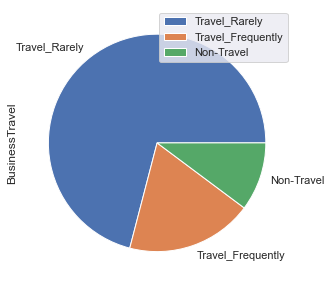

In [ ]:
fig = plt.figure(figsize=(5,5))
ax =plt.gca()
cat_df.loc[:,"BusinessTravel"].value_counts().plot.pie(subplots=True,legend=True,ax=ax)

### Graficando los campos de formación

array([<AxesSubplot:ylabel='EducationField'>], dtype=object)

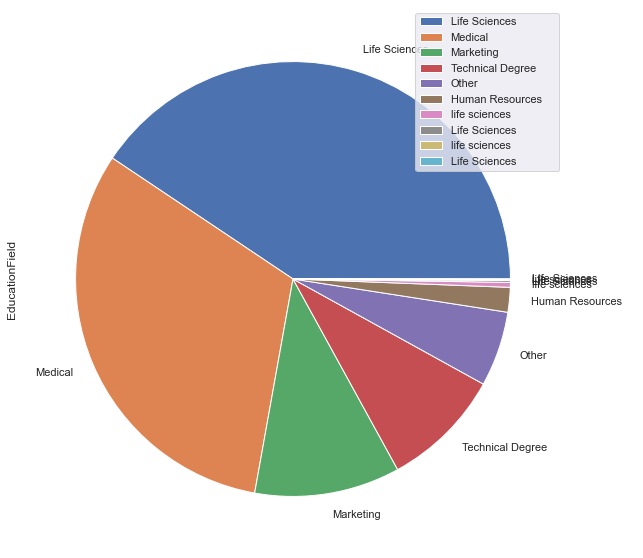

In [ ]:
fig = plt.figure(figsize=(10,10))
ax =plt.gca()
cat_df.loc[:,"EducationField"].value_counts().plot.pie(subplots=True,legend=True,ax=ax)

### Uniformizando los valores categoricos

In [ ]:
cat_df.loc[:,"EducationField"].unique()


array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources', 'life sciences',
       'life sciences    ', 'Life Sciences             ',
       'Life Sciences      '], dtype=object)

In [ ]:
cat_df['EducationField']=cat_df['EducationField'].str.rstrip()

In [ ]:
cat_df.loc[:,"EducationField"].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources', 'life sciences'],
      dtype=object)

In [ ]:
cat_df['EducationField']=cat_df['EducationField'].str.replace('life sciences','Life Sciences')

In [ ]:
cat_df.loc[:,"EducationField"].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

array([<AxesSubplot:ylabel='EducationField'>], dtype=object)

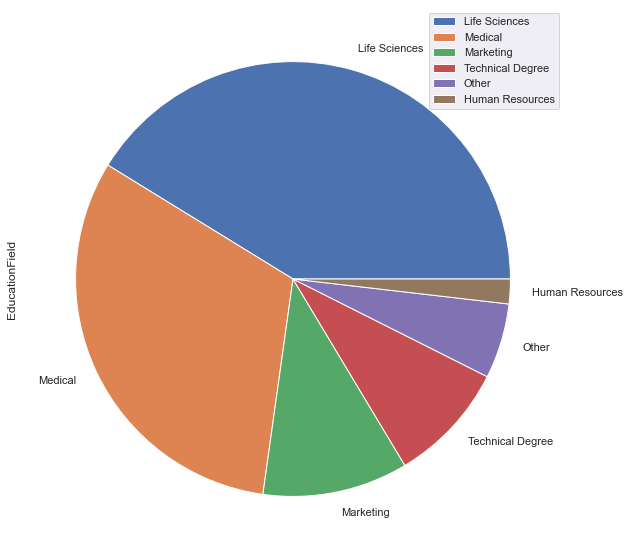

In [ ]:
fig = plt.figure(figsize=(10,10))
ax =plt.gca()
cat_df.loc[:,"EducationField"].value_counts().plot.pie(subplots=True,legend=True,ax=ax)

In [ ]:
cat_df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources', 'sales',
       '"Research & Development"', 'Research & Development`', '<Sales>',
       'Sales`'], dtype=object)

In [ ]:
cat_df['Department']=cat_df['Department'].replace(['sales','<Sales>','Sales`'],'Sales')

In [ ]:
cat_df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources',
       '"Research & Development"', 'Research & Development`'],
      dtype=object)

In [ ]:
cat_df['Department']=cat_df['Department'].replace(['"Research & Development"','Research & Development`'],'Research & Development')

In [ ]:
cat_df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [ ]:
cat_df.head(10)

BusinessTravel              Department EducationField      Gender  \
0      Travel_Rarely                   Sales  Life Sciences      Female   
1  Travel_Frequently  Research & Development  Life Sciences      Female   
2  Travel_Frequently  Research & Development          Other        Male   
3         Non-Travel  Research & Development  Life Sciences        Male   
4      Travel_Rarely  Research & Development        Medical        Male   
5      Travel_Rarely  Research & Development  Life Sciences      Female   
6      Travel_Rarely  Research & Development        Medical        Male   
7      Travel_Rarely  Research & Development  Life Sciences        Male   
8      Travel_Rarely  Research & Development  Life Sciences        Male   
9         Non-Travel  Research & Development        Medical  Female       

                     JobRole MaritalStatus Over18  
0  Healthcare Representative       Married      Y  
1         Research Scientist        Single      Y  
2            Sales Executive       Married      Y  
3            Human Resources       Married      Y  
4            Sales Executive        Single      Y  
5          Research Director       Married      Y  
6            Sales Executive        Single      Y  
7            Sales Executive       Married      Y  
8      Laboratory Technician       Married      Y  
9      Laboratory Technician      Divorced      Y

In [ ]:
#Variable Gender
cat_df['Gender'].unique()

array(['Female', 'Male', 'Female    ', 'F', 'm'], dtype=object)

In [ ]:
cat_df['Gender']=cat_df['Gender'].str.rstrip()

In [ ]:
cat_df['Gender'].unique()

array(['Female', 'Male', 'F', 'm'], dtype=object)

In [ ]:
cat_df['Gender']=cat_df['Gender'].replace(['F'],'Female')
cat_df['Gender']=cat_df['Gender'].replace(['m'],'Male')

In [ ]:
cat_df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
cat_df['JobRole'].unique()

array(['Healthcare Representative', 'Research Scientist',
       'Sales Executive', 'Human Resources', 'Research Director',
       'Laboratory Technician', 'Manufacturing Director',
       'Sales Representative', 'Manager', 'RS', 'm�nager',
       '{Laboratory Technician}', '#manager', 'Laboratory Technician,',
       '[Laboratory Technician]'], dtype=object)

In [ ]:
cat_df['JobRole']=cat_df['JobRole'].replace(['m�nager','#manager'],'Manager')

In [ ]:
cat_df['JobRole'].unique()

array(['Healthcare Representative', 'Research Scientist',
       'Sales Executive', 'Human Resources', 'Research Director',
       'Laboratory Technician', 'Manufacturing Director',
       'Sales Representative', 'Manager', 'RS', '{Laboratory Technician}',
       'Laboratory Technician,', '[Laboratory Technician]'], dtype=object)

In [ ]:
cat_df['JobRole']=cat_df['JobRole'].replace(['{Laboratory Technician}','Laboratory Technician,','[Laboratory Technician]'],'Laboratory Technician')

In [ ]:
cat_df['JobRole'].unique()

array(['Healthcare Representative', 'Research Scientist',
       'Sales Executive', 'Human Resources', 'Research Director',
       'Laboratory Technician', 'Manufacturing Director',
       'Sales Representative', 'Manager', 'RS'], dtype=object)

In [ ]:
cat_df['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [ ]:
cat_df['Over18'].unique()

array(['Y'], dtype=object)

In [ ]:
#Graficando un Plot de barras agrupadas

<AxesSubplot:ylabel='Department'>

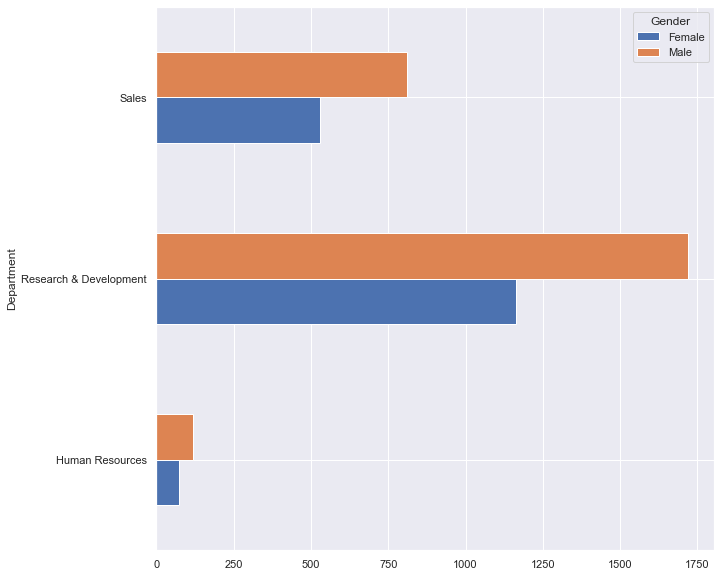

In [ ]:
fig = plt.figure(figsize=(10,10))
ax =plt.gca()
cat_df.groupby(["Department"]).Gender.value_counts().unstack().plot.barh(ax=ax)

### Graficando pies agrupados

C:\Users\lucio\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<AxesSubplot:ylabel='Human Resources'>,
       <AxesSubplot:ylabel='Research & Development'>,
       <AxesSubplot:ylabel='Sales'>], dtype=object)

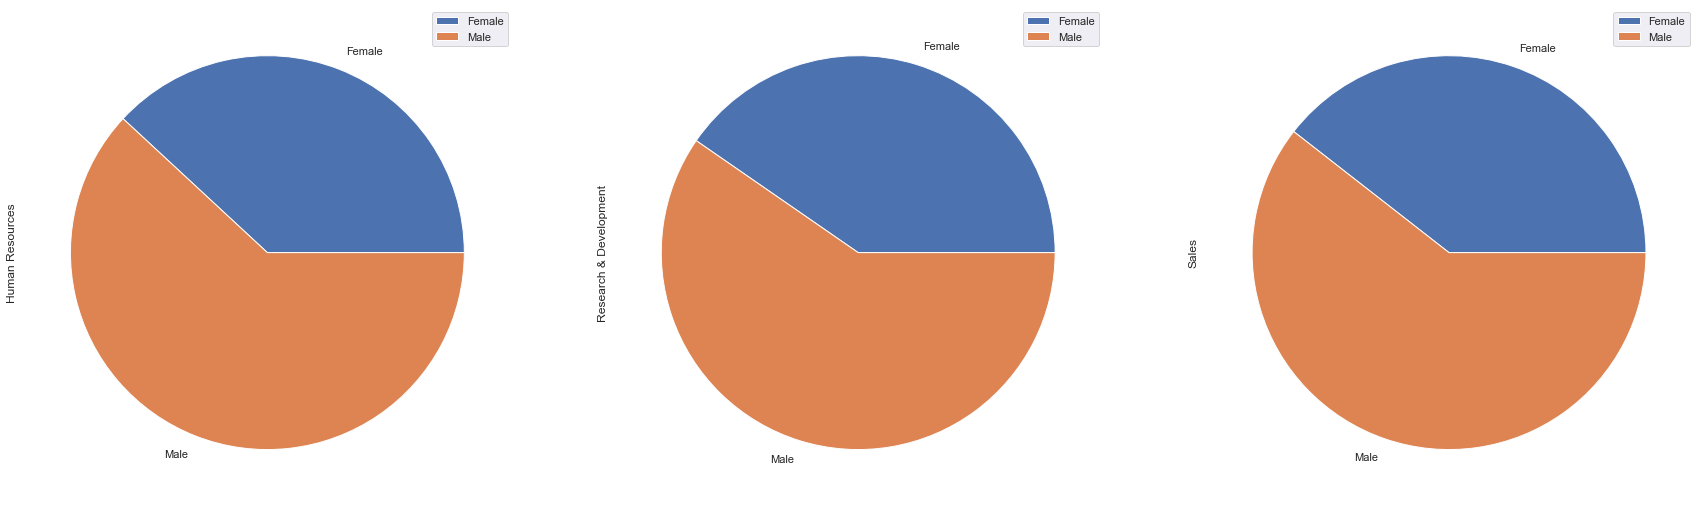

In [ ]:
fig = plt.figure(figsize=(30,30))
ax =plt.gca()
cat_df.groupby(["Gender"]).Department.value_counts().unstack().plot.pie(subplots=True,ax=ax)

C:\Users\lucio\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<AxesSubplot:ylabel='Human Resources'>,
       <AxesSubplot:ylabel='Research & Development'>,
       <AxesSubplot:ylabel='Sales'>], dtype=object)

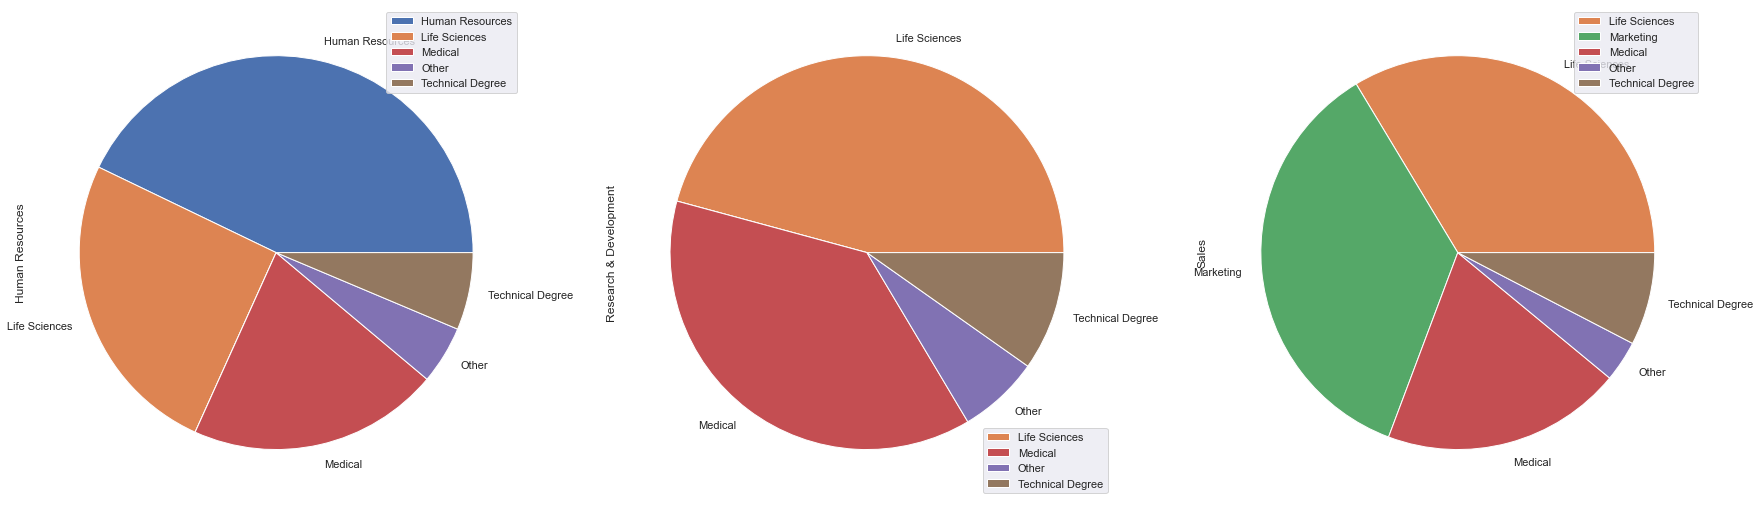

In [ ]:
fig = plt.figure(figsize=(30,30))
ax =plt.gca()
#cat_df.loc['Department'].groupby(["Department"]).Gender.value_counts().unstack(0).plot.pie(subplots=True,ax=ax)
cat_df.groupby(["EducationField"]).Department.value_counts().unstack().plot.pie(subplots=True,ax=ax)

### M) El dataframe limpio

In [ ]:
clean_df = pd.concat([num_df,cat_df,num_cols_df.loc[:,"Attrition"]],axis=1)

In [ ]:
clean_df.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'emp_id', 'BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18',
       'Attrition'],
      dtype='object')

# II) Creación del Modelo

## A) Preparación

### Viendo porcentajes de la variable Atrition

In [ ]:
clean_df.groupby("Attrition",as_index=True).size()*100/clean_df.shape[0]

Attrition
0    83.877551
1    16.122449
dtype: float64

In [ ]:
### Para los dos tipos de variables

In [ ]:
num_cols = list(clean_df.dtypes[clean_df.dtypes.astype(str).isin(["int64","float64"])].index.difference(pd.Index(["Attrition"])))
cat_cols= list(clean_df.dtypes[clean_df.dtypes.astype(str).isin(["object"])].index)

In [ ]:
num_cols

['Age',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'emp_id']

## B) Creación del modelo

In [ ]:
regularization = 0.001
class_weight = "balanced"
random_state = 10
max_iter =1000
pipe = Pipeline([('feats',FeatureUnion([
    ('num_vars',Pipeline([('num_selector',ColumnTransformer([("selector","passthrough",num_cols)],remainder="drop")),('scaler',StandardScaler())])),
    ('cat_vars',Pipeline([('cat_selector',ColumnTransformer([("selector","passthrough",cat_cols)],remainder="drop")),('dummy',OneHotEncoder(handle_unknown="ignore"))]))]
)),('model',LogisticRegression(C=regularization,class_weight=class_weight,random_state=random_state,max_iter=max_iter))])


In [ ]:
pipe

Pipeline(steps=[('feats',
                 FeatureUnion(transformer_list=[('num_vars',
                                                 Pipeline(steps=[('num_selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Age',
                                                                                                    'DistanceFromHome',
                                                                                                    'Education',
                                                                                                    'EmployeeCount',
                                                                                                    'EnvironmentSatisfaction',
                      

## C) Entrenando al modelo

### Separando en elementos de entrenamiento y verificación

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(clean_df.iloc[:,:-1],clean_df.iloc[:,-1],test_size=0.20)

In [ ]:
X_train, X_test, y_train, y_test

(      Age  DistanceFromHome  Education  EmployeeCount  \
 22     53                11          4              1   
 3792   35                 2          3              1   
 1435   38                 1          2              1   
 2815   41                17          2              1   
 2265   57                 2          1              1   
 ...   ...               ...        ...            ...   
 2406   47                 1          4              1   
 4312   22                 3          3              1   
 3902   36                 1          4              1   
 1055   29                 8          2              1   
 1802   33                 3          4              1   
 
       EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
 22                        3.0               3         2              3.0   
 3792                      1.0               1         1              1.0   
 1435                      1.0               3         4              3

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('feats',
                 FeatureUnion(transformer_list=[('num_vars',
                                                 Pipeline(steps=[('num_selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Age',
                                                                                                    'DistanceFromHome',
                                                                                                    'Education',
                                                                                                    'EmployeeCount',
                                                                                                    'EnvironmentSatisfaction',
                      

### D) Usando el modelo

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
pipe

Pipeline(steps=[('feats',
                 FeatureUnion(transformer_list=[('num_vars',
                                                 Pipeline(steps=[('num_selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Age',
                                                                                                    'DistanceFromHome',
                                                                                                    'Education',
                                                                                                    'EmployeeCount',
                                                                                                    'EnvironmentSatisfaction',
                      

In [ ]:
probs_y=pipe.predict_proba(X_test)
probs_y = np.round(probs_y, 2)

In [ ]:
probs_y

array([[0.52, 0.48],
       [0.68, 0.32],
       [0.42, 0.58],
       ...,
       [0.41, 0.59],
       [0.4 , 0.6 ],
       [0.39, 0.61]])

In [ ]:
#res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
#res += "-"*65+"\n"
#res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
#res += "\n"+"-"*65+"\n"
#print(res)
##
res = "{:<10} | {:<10} | {:<10} | {:<13} ".format("y_test", "y_pred", "Si(%)", "No(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} ".format(x, y, z,u) for x, y,z,u in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Si(%)      | No(%)
        -----------------------------------------------------------------
0          | 0          | 0.52       | 0.48          
0          | 0          | 0.68       | 0.32          
1          | 1          | 0.42       | 0.58          
0          | 1          | 0.38       | 0.62          
1          | 1          | 0.47       | 0.53          
0          | 1          | 0.41       | 0.59          
0          | 0          | 0.63       | 0.37          
0          | 0          | 0.67       | 0.33          
0          | 1          | 0.43       | 0.57          
0          | 0          | 0.69       | 0.31          
0          | 1          | 0.37       | 0.63          
0          | 0          | 0.51       | 0.49          
0          | 0          | 0.54       | 0.46          
1          | 0          | 0.55       | 0.45          
0          | 0          | 0.65       | 0.35          
0          | 0          | 0.54       | 0.46          
0          | 0   

### E) Analizando resultados

<AxesSubplot:>

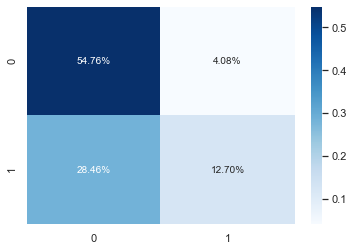

In [ ]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%',cmap="Blues")

In [ ]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%',cmap="Blues")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77       734
           1       0.31      0.76      0.44       148

    accuracy                           0.67       882
   macro avg       0.62      0.71      0.60       882
weighted avg       0.83      0.67      0.72       882



### Se puede ver que f1-score esta algo cerca a 1, es razonable el modelo

In [ ]:
probs_y_otro=pipe.predict_log_proba(X_test)
probs_y_otro = np.round(probs_y, 2)

In [ ]:
probs_y_otro

array([[0.52, 0.48],
       [0.68, 0.32],
       [0.42, 0.58],
       ...,
       [0.41, 0.59],
       [0.4 , 0.6 ],
       [0.39, 0.61]])

In [ ]:
pipe.score(X_train, y_train)

0.66921768707483